In [1]:
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

import glob
import numpy as np
import os

In [2]:
training_dir_base = '/home/users/ksf293/clust/results_aemulus_train'
plot_dir = '../plots/plots_2022-02-08'
!mkdir -p $plot_dir

In [3]:
knn_labels = {'knn1': '1NN',
              'knn2': '2NN',
              'knn3': '3NN'}

Should I be computing the crossover point of CDF and 1-CDF and plotting that point at the peak? In this plot, we likely will not get the peak

In [4]:
def cdf_to_peaked(y):
    idxs_less = np.where(y < 0.5)[0]
    idxs_greater = sorted(list(set(np.arange(len(y))) - set(idxs_less)))
    y_peaked = np.concatenate((y[idxs_less], 1-y[idxs_greater]))
    return y_peaked

In [5]:
def plot_knns(statistic, r_arr, y_arr, fn_save=None):
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    plt.title(knn_labels[statistic])
    r = r_arr[0] #assume all r's are the same
    for i in range(len(y_arr)):
        y_peaked = cdf_to_peaked(y_arr[i])
        plt.plot(r, y_peaked, color='grey', alpha=0.2, lw=0.5)
    y_mean = np.mean(y_arr, axis=0)
    y_mean_peaked = cdf_to_peaked(y_mean)
    plt.plot(r, y_mean_peaked, color='k', lw=2, label='mean measurement')

    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel(r'$r \: (h^{-1} \mathrm{Mpc})$')
    plt.ylabel('Peaked CDF')
    
    handles, labels = ax.get_legend_handles_labels()
    line = Line2D([0], [0], color='grey', label='measurement on unique\ncosmo+HOD model', lw=0.5)
    handles.insert(0,line) 
    plt.legend(handles=handles, loc='best', fontsize=12)
    if fn_save is not None:
        plt.savefig(f'{plot_dir}/{fn_save}.png', bbox_inches='tight')

In [6]:
statistic = 'knn1'
training_dir = f'{training_dir_base}/results_{statistic}'

fns_y_train = os.listdir(training_dir)
r_arr = []
y_train_arr = []
for fn_y_train in fns_y_train:
    r_vals, y_train = np.loadtxt(os.path.join(training_dir, fn_y_train), delimiter=',', unpack=True)
    r_arr.append(r_vals)
    y_train_arr.append(y_train)
r_arr = np.array(r_arr)
y_train_arr = np.array(y_train_arr)
print(r_arr[0])

[ 1.452345  2.052583  2.900891  4.099796  5.794195  8.18887  11.573236
 16.356321 23.116201]


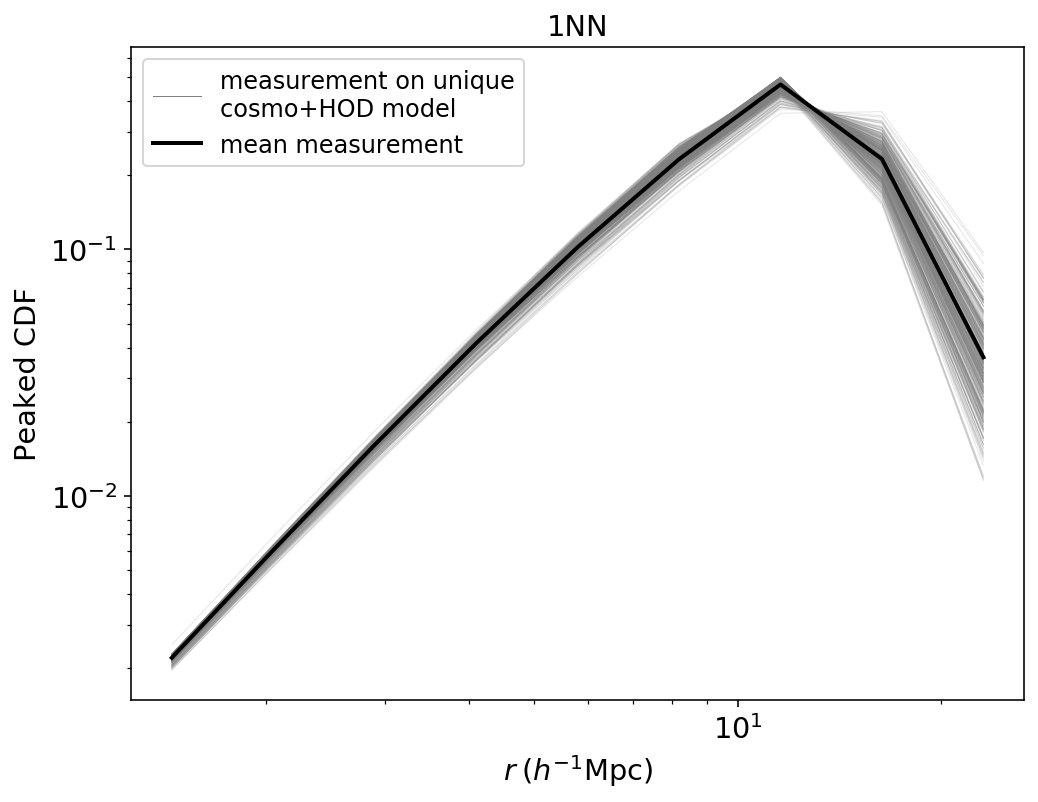

In [7]:
plot_knns(statistic, r_arr, y_train_arr, fn_save=f'{statistic}_training')

In [8]:
statistic = 'knn2'
training_dir = f'{training_dir_base}/results_{statistic}'

fns_y_train = os.listdir(training_dir)
r_arr = []
y_train_arr = []
for fn_y_train in fns_y_train:
    r_vals, y_train = np.loadtxt(os.path.join(training_dir, fn_y_train), delimiter=',', unpack=True)
    r_arr.append(r_vals)
    y_train_arr.append(y_train)
r_arr = np.array(r_arr)
y_train_arr = np.array(y_train_arr)
print(r_arr[0])

[ 3.984339  5.034083  6.360401  8.036161 10.15343  12.82853  16.208433
 20.47883  25.87434 ]


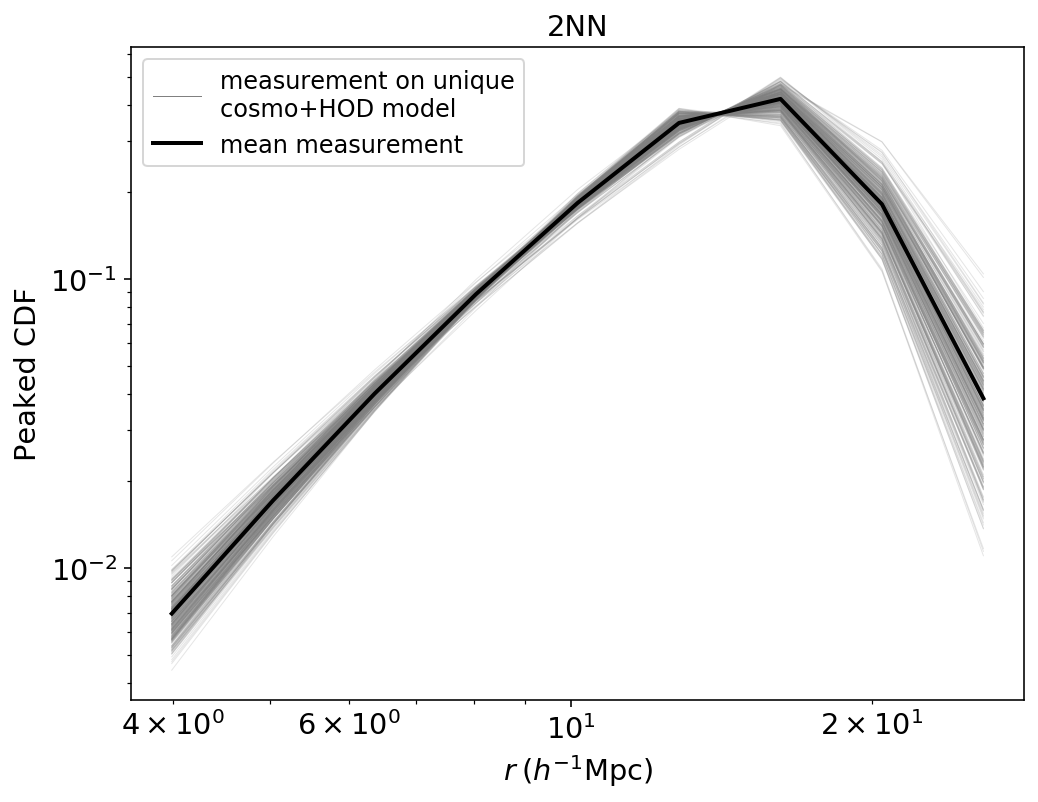

In [9]:
plot_knns(statistic, r_arr, y_train_arr, fn_save=f'{statistic}_training')

In [10]:
statistic = 'knn3'
training_dir = f'{training_dir_base}/results_{statistic}'

fns_y_train = os.listdir(training_dir)
r_arr = []
y_train_arr = []
for fn_y_train in fns_y_train:
    r_vals, y_train = np.loadtxt(os.path.join(training_dir, fn_y_train), delimiter=',', unpack=True)
    r_arr.append(r_vals)
    y_train_arr.append(y_train)
r_arr = np.array(r_arr)
y_train_arr = np.array(y_train_arr)
print(r_arr[0])

[ 5.91059   7.17458   8.708878 10.571287 12.831976 15.576118 18.907099
 22.950417 27.858406]


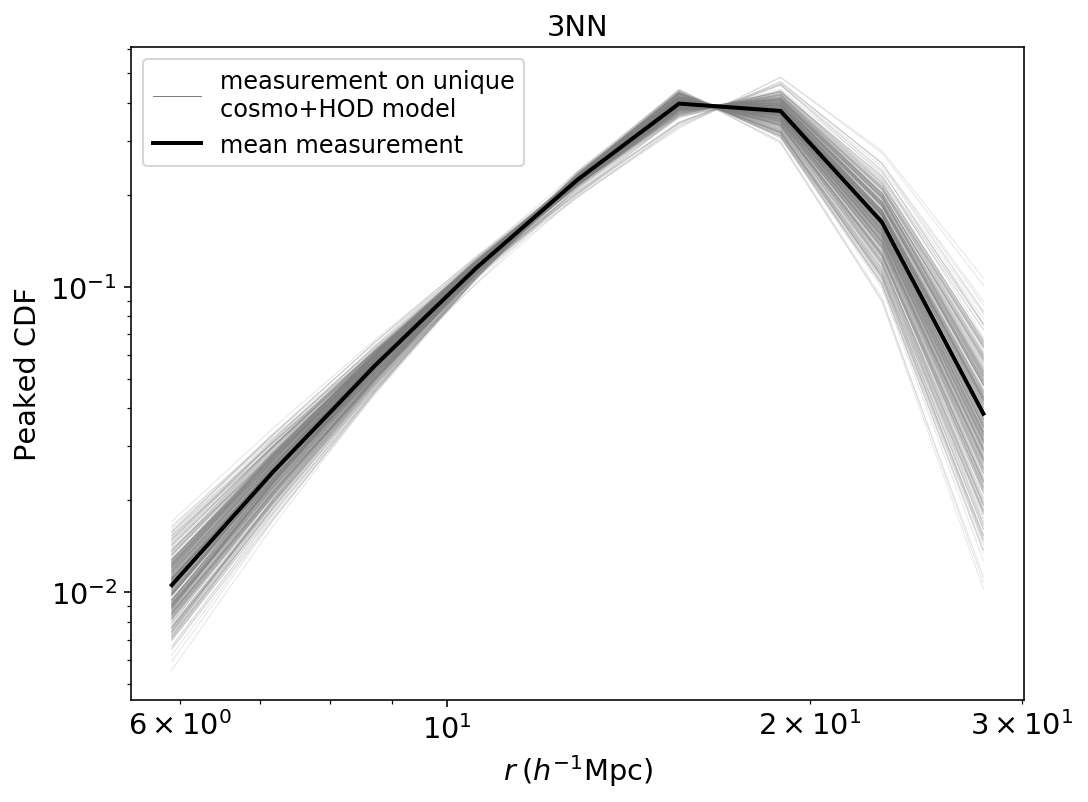

In [11]:
plot_knns(statistic, r_arr, y_train_arr, fn_save=f'{statistic}_training')